In [1]:
%load_ext autoreload
%autoreload 2

#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from datetime import date
from datetime import datetime
import os

import data as data_
import shared

In [2]:
# Paths

folderPath_rsrc = '/Resources/'
folderPath_results = '/Results/'
cwd = os.getcwd()
path_rsrc = cwd + folderPath_rsrc
path_results = cwd + folderPath_results
# read data
ETFs = pd.read_excel(path_rsrc + "ETFs list.xlsx")

In [3]:
ETFs

,Technology,Energy,Telecom,Consumer Discretionary,Real Estate,Industrials,Utilities,Materials,Healthcare,Consumer Staples,Financials
0,AAPB,ACES,FCOM,AMZD,BBRE,AIRR,BLLD,ALUM,AGNG,CHIS,BDCX
1,AAPD,AMJ,IXP,AMZU,BLDG,AQWA,CHIU,BATT,ARKG,CLIX,BDCZ
2,AAPU,AMLP,IYZ,BAD,BYRE,ARKX,ECLN,CHIM,BBC,EATV,BIZD
3,AIQ,AMNA,LTL,BEDZ,CHIR,AWAY,EMIF,CIRC,BBH,EATZ,BNKD
4,ARKK,AMND,NXTG,BETZ,DFGR,BDRY,FUTY,COPX,BBP,ECON,BNKU
...,...,...,...,...,...,...,...,...,...,...,...
163,XPND,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
164,XSD,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
165,XSW,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
166,XT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
sector = "Energy"
energy = ETFs[sector]
energy.dropna(inplace=True)

In [5]:
energy = energy.to_list()

In [6]:
len(energy)

86

In [7]:
energy

['ACES',
 'AMJ',
 'AMLP',
 'AMNA',
 'AMND',
 'AMTR',
 'AMUB',
 'AMZA',
 'ATMP',
 'BNE',
 'CHIE',
 'CNRG',
 'CRAK',
 'CTEC',
 'CTEX',
 'DIG',
 'DRIP',
 'DRLL',
 'DUG',
 'EINC',
 'EMLP',
 'ENFR',
 'ENRG',
 'ERTH',
 'ERUS',
 'ERX',
 'ERY',
 'FAN',
 'FCG',
 'FENY',
 'FILL',
 'FRNW',
 'FTXN',
 'FXN',
 'GCLN',
 'GUSH',
 'HDRO',
 'HJEN',
 'HYDR',
 'ICLN',
 'IEO',
 'IEZ',
 'IXC',
 'IYE',
 'KLNE',
 'KWT',
 'LCTD',
 'LNGG',
 'MLPA',
 'MLPB',
 'MLPO',
 'MLPR',
 'MLPX',
 'NBCT',
 'NETZ',
 'NLR',
 'NRGD',
 'NRGU',
 'NTZG',
 'NZAC',
 'NZUS',
 'OIH',
 'PBD',
 'PBW',
 'PSCE',
 'PXE',
 'PXI',
 'PXJ',
 'QCLN',
 'RAYS',
 'RNRG',
 'RNWZ',
 'RSPG',
 'SMOG',
 'SOLR',
 'TAN',
 'TPYP',
 'UMI',
 'USAI',
 'VCLN',
 'VDE',
 'VMAT',
 'WNDY',
 'XES',
 'XLE',
 'XOP']

## Handling data
---

### Download data

In [8]:
# download data

end_ = date.today()  # yyyy-mm-dd
if end_.day == 31:
    start_ = datetime(end_.year, end_.month - 1, 30)
else:
    start_ = datetime(end_.year, end_.month - 1, end_.day)

download = True
if download:
    df = data_.downloadAllTickers(tickers=energy, start=start_, end=end_, period='w', group_by='column')

In [9]:
df.head()

adjusted_close                                 close          \
                     VMAT    WNDY    XES    XLE     XOP    VMAT    WNDY   
date                                                                      
2023-10-09         25.948  12.270  92.79  88.59  145.24  25.948  12.270   
2023-10-10         26.168  12.590  93.04  88.70  145.68  26.168  12.590   
2023-10-11         26.366  12.615  93.72  87.56  145.44  26.366  12.615   
2023-10-12         26.134  12.420  92.64  87.66  145.49  26.134  12.420   
2023-10-13         25.710  12.190  94.31  89.59  148.56  25.710  12.190   

                                  ...    open                               \
              XES    XLE     XOP  ...    VMAT   WNDY    XES    XLE     XOP   
date                              ...                                        
2023-10-09  92.79  88.59  145.24  ...  25.948  12.21  91.34  88.03  143.31   
2023-10-10  93.04  88.70  145.68  ...  26.168  12.50  93.03  88.67  145.45   
2023-10-11  93.72  87.56  145.44  ...  26.366  12.53  92.57  87.79  143.95   
2023-10-12  92.64  87.66  145.49  ...  26.134  12.37  94.86  88.49  146.82   
2023-10-13  94.31  89.59  148.56  ...  26.020  12.30  94.43  89.09  148.11   

           volume                                   
             VMAT  WNDY     XES       XLE      XOP  
date                                                
2023-10-09      2   900  130636  30744529  7315900  
2023-10-10      0  4600  138626  20850250  4916500  
2023-10-11      0   400   91100  23572661  6067200  
2023-10-12    100  2100  115400  19993223  4507200  
2023-10-13    700   300   75200  24266126  4934900  

[5 rows x 30 columns]

In [10]:
closes_df = df.close

In [11]:
closes_df.head()

,VMAT,WNDY,XES,XLE,XOP
date,,,,,
2023-10-09,25.948,12.270,92.79,88.59,145.24
2023-10-10,26.168,12.590,93.04,88.70,145.68
2023-10-11,26.366,12.615,93.72,87.56,145.44
2023-10-12,26.134,12.420,92.64,87.66,145.49
2023-10-13,25.710,12.190,94.31,89.59,148.56


## Calcular retornos

In [12]:
returns = closes_df.pct_change()

In [13]:
returns.tail()

,VMAT,WNDY,XES,XLE,XOP
date,,,,,
2023-11-01,0.011363,-0.010980,0.004802,-0.002348,-0.001859
2023-11-02,0.019205,0.038002,0.029586,0.030239,0.025940
2023-11-03,0.014266,0.027561,-0.003868,-0.010050,-0.007330
2023-11-06,-0.001579,0.000000,-0.021746,-0.011306,-0.026622
2023-11-07,0.002301,-0.014812,-0.050244,-0.022170,-0.028325


In [14]:
# sort last row values
values = returns.iloc[-1].sort_values(ascending=False)
# max and min values
val_max = values.max()
val_min = values.min()

In [15]:
values

VMAT    0.002301
WNDY   -0.014812
XLE    -0.022170
XOP    -0.028325
XES    -0.050244
Name: 2023-11-07, dtype: float64

In [16]:
test = [round(i*100,2) for i in values]
test

[0.23, -1.48, -2.22, -2.83, -5.02]

In [17]:
length = len(test)
# the idea is to shape an a X b matrix
a = int(np.sqrt(length))
b = int(np.ceil(length/a))
m_length = a * b                # matrix "length"

if m_length >= length:
    # compute how many elements need to be add to the array
    diff = abs(length - m_length)
    
    add =np.full(diff, np.nan)
    new_array = np.append(test, add)
    new_array = new_array.reshape(a, b)
    
    # add names to the plot
    names = values.index.to_list()
    add_names =np.full(diff, '---')
    new_names = np.append(names, add_names)
    new_names = new_names.reshape(a, b)

In [18]:
new_array

array([[ 0.23, -1.48, -2.22],
       [-2.83, -5.02,   nan]])

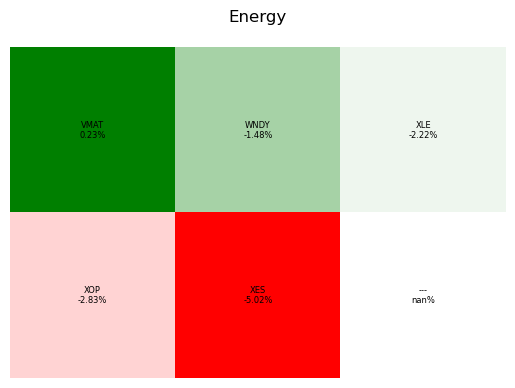

In [19]:
valores = new_array
from  matplotlib.colors import LinearSegmentedColormap
cmap_=LinearSegmentedColormap.from_list('rg',["r", "w", "g"], N=256) 

# "RdYlGn"
fig, ax = plt.subplots()

# Especificamos paleta de colores a usar y rango de valores a representar.
ax.imshow(valores, cmap=cmap_, vmin=val_min*100, vmax=val_max*100)
# borrar axis labels
ax.set_yticklabels([])
ax.set_xticklabels([])

# Reducimos la longitud de las marcas a 0 para que no sean visibles
ax.tick_params(axis=u'both', which=u'both', length=0)
for lado in ['left', 'right', 'bottom', 'top']:
    ax.spines[lado].set_visible(False)

# # Indicamos las posiciones donde dibujaremos la rejilla  
xmin,xmax = ax.get_xlim()
ymin,ymax = ax.get_ylim()

ax.set_yticks(np.arange(ymax, ymin+1), minor=True)
ax.set_xticks(np.arange(xmin, xmax+1), minor=True)
# Dibujamos la rejilla de color blanco para que actue como separador.
ax.grid(which='minor', color='w', linestyle='-', linewidth=2)

for i in range(new_array.shape[0]):
    for j in range(new_array.shape[1]):
        # print(i, j, valores[i,j])
        text = ax.text(j, i, str(new_names[i, j]) + '\n' + str(valores[i, j])+'%',
                       ha="center", va="center", color="k", size=6)

ax.set_title(f"{sector}\n")
        
plt.savefig(f"{sector}.png")
plt.show()
